In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv('./powerconsumption.csv/powerconsumption.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])
print(df.info())
print(df.describe())
print(df.head(10).to_markdown())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                52416 non-null  datetime64[ns]
 1   Temperature             52416 non-null  float64       
 2   Humidity                52416 non-null  float64       
 3   WindSpeed               52416 non-null  float64       
 4   GeneralDiffuseFlows     52416 non-null  float64       
 5   DiffuseFlows            52416 non-null  float64       
 6   PowerConsumption_Zone1  52416 non-null  float64       
 7   PowerConsumption_Zone2  52416 non-null  float64       
 8   PowerConsumption_Zone3  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB
None
                  Datetime   Temperature      Humidity     WindSpeed  \
count                52416  52416.000000  52416.000000  52416.000000   
mean   2017-07-01 23:55:

In [13]:
df.isnull().sum()

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
# Đặt Datetime làm Index và Resample về 1 giờ
df_hourly = df.set_index('Datetime').resample('H').mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_18392\1178096272.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.set_index('Datetime').resample('H').mean()


In [16]:
df_final = df_hourly[['PowerConsumption_Zone1', 'Temperature', 'Humidity', 'WindSpeed']].copy()
df_final.columns = ['load', 'temp', 'humidity', 'wind_speed']
df_final = df_final.ffill()

In [17]:
df_final.to_csv('dataclean.csv')

In [4]:
df = pd.read_csv('./dataclean.csv', index_col=0, parse_dates=True)
print(df.info())
print(df.describe())
print(df.head(10).to_markdown())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8736 entries, 2017-01-01 00:00:00 to 2017-12-30 23:00:00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   load        8736 non-null   float64
 1   temp        8736 non-null   float64
 2   humidity    8736 non-null   float64
 3   wind_speed  8736 non-null   float64
dtypes: float64(4)
memory usage: 341.2 KB
None
               load         temp     humidity   wind_speed
count   8736.000000  8736.000000  8736.000000  8736.000000
mean   32344.970564    18.810024    68.259518     1.959489
std     7068.919876     5.807624    15.475739     2.340551
min    14329.113923     3.602167    12.710000     0.054667
25%    26292.951730    14.403750    58.324583     0.078167
50%    32342.303347    18.759167    69.815833     0.085500
75%    37318.002218    22.866667    81.350000     4.915333
max    51844.261932    39.695000    94.750000     5.933667
| Datetime            |    load | 

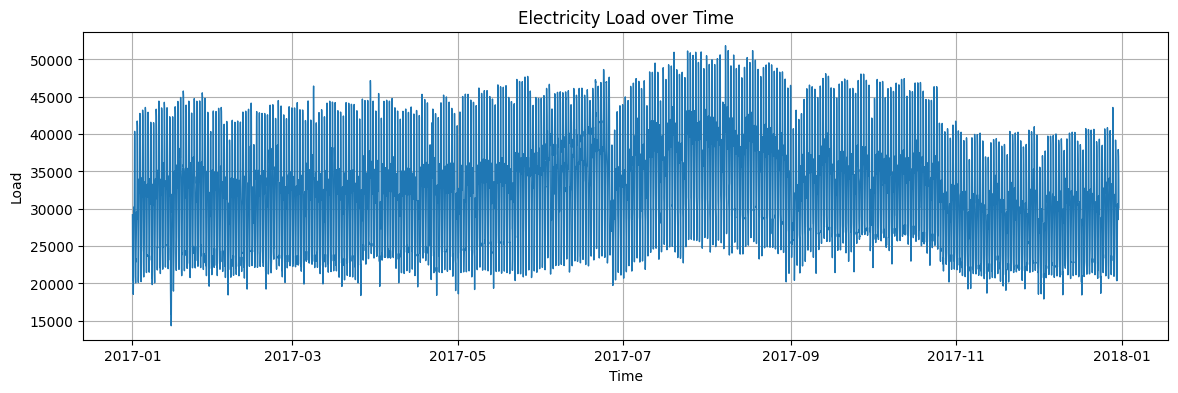

In [7]:
plt.figure(figsize=(14,4))
plt.plot(df.index, df['load'], linewidth=1)
plt.title("Electricity Load over Time")
plt.xlabel("Time")
plt.ylabel("Load")
plt.grid(True)
plt.show()

- Tính chu kỳ rõ rệt theo ngày:
    - Đường load xuất hiện các đỉnh và đáy lặp lại với tần suất cao, phản ánh chu kỳ tiêu thụ điện hàng ngày (giờ cao điểm và thấp điểm).

- Xu hướng theo mùa (seasonality dài hạn):
    - Mức tiêu thụ điện tăng dần từ đầu năm và đạt đỉnh vào khoảng tháng 7–8, sau đó giảm dần về cuối năm. Điều này phù hợp với nhu cầu làm mát vào mùa hè.

- Biên độ dao động thay đổi theo thời gian:
    - Trong mùa hè, load không chỉ cao hơn mà còn dao động mạnh hơn, cho thấy sự biến động lớn trong nhu cầu điện.

- Chuỗi không dừng (non-stationary):
    - Sự tồn tại của cả xu hướng và chu kỳ cho thấy chuỗi thời gian không dừng, gây khó khăn cho các mô hình thống kê tuyến tính như VAR nếu không xử lý trước.

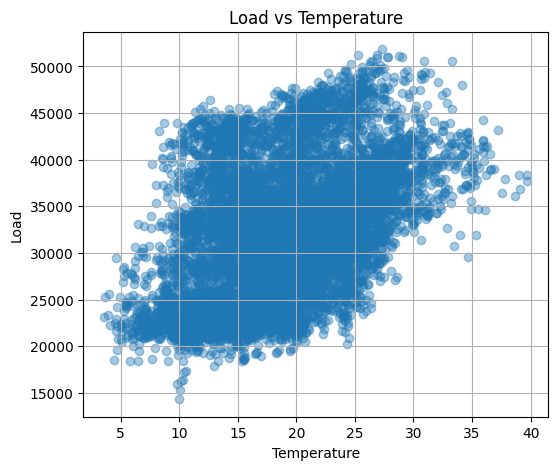

In [9]:
plt.figure(figsize=(6,5))
plt.scatter(df['temp'], df['load'], alpha=0.4)
plt.title("Load vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Load")
plt.grid(True)
plt.show()

- Mối quan hệ thuận rõ rệt:
    - Khi nhiệt độ tăng, điện năng tiêu thụ có xu hướng tăng theo, thể hiện mối quan hệ dương giữa hai biến.

- Quan hệ phi tuyến:
    - Các điểm dữ liệu không nằm trên một đường thẳng mà phân tán theo dạng “đám mây”, cho thấy mối quan hệ không hoàn toàn tuyến tính.
    - Điều này phản ánh thực tế rằng nhu cầu điện tăng mạnh ở nhiệt độ cao (do sử dụng điều hòa), nhưng không tăng đều theo một quy luật tuyến tính đơn giản.

- Độ phân tán lớn tại cùng mức nhiệt độ:
    - Ở cùng một giá trị nhiệt độ, load vẫn có độ biến động đáng kể.
    - Điều này cho thấy nhiệt độ không phải yếu tố duy nhất, mà còn chịu ảnh hưởng bởi thời điểm trong ngày, ngày trong tuần và các yếu tố thời tiết khác.

-> Biểu đồ cho thấy nhiệt độ có ảnh hưởng mạnh và thuận chiều đến điện năng tiêu thụ, tuy nhiên mối quan hệ mang tính phi tuyến và chịu ảnh hưởng bởi nhiều yếu tố khác, do đó phù hợp với các mô hình học máy và học sâu.

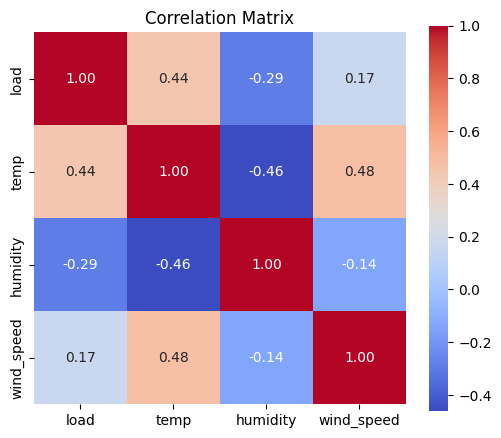

In [11]:
import seaborn as sns

plt.figure(figsize=(6,5))
corr = df[['load', 'temp', 'humidity', 'wind_speed']].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True
)

plt.title("Correlation Matrix")
plt.show()

- Temperature là biến ảnh hưởng mạnh nhất đến load:
    - Hệ số tương quan giữa load và temperature ≈ 0.44, cho thấy mối quan hệ thuận mức trung bình, khẳng định vai trò quan trọng của nhiệt độ trong tiêu thụ điện.

- Humidity có ảnh hưởng ngược chiều đến load:
    - Hệ số tương quan giữa load và humidity ≈ −0.29, cho thấy khi độ ẩm tăng, điện năng tiêu thụ có xu hướng giảm nhẹ.
    - Ảnh hưởng này yếu hơn so với nhiệt độ nhưng vẫn mang thông tin bổ sung.

- Wind speed ảnh hưởng yếu đến load:
    - Tương quan giữa load và wind_speed ≈ 0.17, cho thấy tốc độ gió chỉ có tác động nhỏ và không phải yếu tố chính quyết định mức tiêu thụ điện.

- Mối quan hệ giữa các biến thời tiết:

    - Temperature và humidity có tương quan âm khá mạnh (≈ −0.46)

    - Temperature và wind speed có tương quan dương (≈ 0.48)
    - Điều này cho thấy các biến thời tiết không độc lập hoàn toàn, cần được xem xét đồng thời trong mô hình đa biến.